<center><h2>DS102 Problem Set - Week 3</h2></center>
**Hackwagon Academy**

`HWA-DS102-PS3-201810`
<hr>

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups.

<div class="alert alert-success">Before you start, fill in your details for this notebook and rename the notebook to `<First_Name>_<Last_Name>-problem-set-week-3`, for example `jane-doe-problem-set-week-3`.</div>

In [168]:
# Name  : Tan Wei Xuan
# Class : DS102, Saturday 3.30pm

#### Datasets Required:

- `sgp-literacy-rate.csv`

- `insurance-claims.csv`

- `ks-projects-15k.csv`

- `wines-200.csv`

- `loans-by-grade.csv`

In [503]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set matplotlib inline
%matplotlib inline

### Part 1 (5 Marks)
Mark breakdowns are stated in the question e.g. **`[1]`**. For questions wtih short answers, <span style="color:darkblue">**both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span> <span style="color:darkblue">**For plotting, <u>all features</u> must be present to receive full credit.**</span>

**1A**. 

**i)** What are the key features of a plot that needs to be explicitly stated? **`[0.5]`**

In [504]:
# What are the key features of a plot that needs to be explicitly stated?

# The key features of a plot that needs to be explicitly stated are the title, legend, x-axis label and y-axis label

**ii)**  You are given the following data in `sgp-literacy-rate.csv`, taken from [World Bank Open Data](https://data.worldbank.org/indicator/SE.ADT.LITR.ZS?view=chart). The definition of each column is as follows:

`sgp-literacy-rate.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| literacy_rate | The percentage of people aged 15 and above who can both read and write | float | 96.716660 |
| year | The year in which the literacy rate was obtained | int | 2010 |

** Read from CSV to `df`**

Read the data from the `sgp-literacy-rate.csv` CSV file into a `DataFrame` called `sgp_lr_df`.

In [505]:
# Read from CSV to sgp_lr_df. Write your code here.
sgp_lr_df = pd.read_csv('sgp-literacy-rate.csv', sep='|')

sgp_lr_df

,literacy_rate,year
0,95.857330,2010
1,96.186081,2011
2,96.369789,2012
3,96.548080,2013
4,96.716660,2014
5,96.825493,2015
6,97.049591,2016


The following code to plot the line graph is given to you. It plots the literacy rate of Singapore (% of people ages 15 and above) from 2010 to 2016. Perform the following steps:

1. Run the code to plot the line graph. 
2. Using your answer from **1A** or otherwise, modify the code to add the missing features of the plot. **`[1]`**

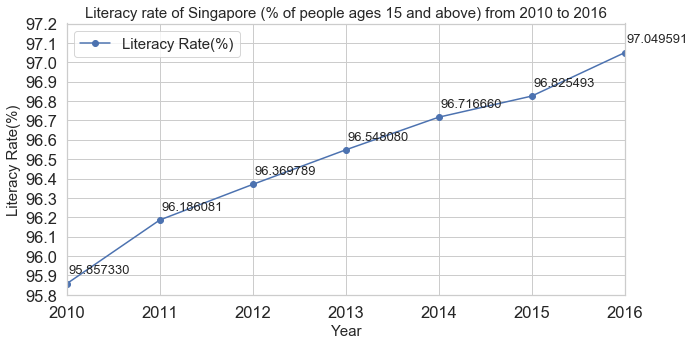

In [506]:
# Instructions: modify the code to add the missing features of the plot

filt_cond1 = sgp_lr_df['year'] >= 2010
filt_cond2 = sgp_lr_df['year'] <= 2016

sgp_lr_df_filt = sgp_lr_df[filt_cond1 & filt_cond2]

fig, ax1 = plt.subplots()
sgp_lr_df_filt.plot(kind='line', x='year', y='literacy_rate', ax=ax1, figsize=(10,5), marker='o')
    
plt.ylabel("Literacy Rate(%)",fontsize=15)
plt.yticks(np.arange(95.8, 97.2, 0.1))
plt.xlabel("Year",fontsize=15)
plt.title("Literacy rate of Singapore (% of people ages 15 and above) from 2010 to 2016",fontsize=15)
ax1.legend(["Literacy Rate(%)"],fontsize=15,loc=2)

#To show y-values on markers

for x,y in zip(sgp_lr_df_filt['year'],sgp_lr_df_filt['literacy_rate']):

    label = "{:.6f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(2,10), # distance from text to points (x,y)
                 ha='left',
                 fontsize = 13) # horizontal alignment can be left, right or center

# Display the line graph
plt.show()

**1B.** You are given a baggage loss dataset from the [TSA Claims Database](https://www.kaggle.com/terminal-security-agency/tsa-claims-database). In this dataset, the `case_number` represents the unique ID associated with the case from the insurer and `claim_amount` is the amount of claim filed by the passenger, or the loss due to travelling borne by the passenger.

#### Read from CSV to `df`
Read the dataset from `insurance-claims.csv` to a `DataFrame` called `ins_df`.

In [507]:
# Read from CSV to ins_df. Write your code here.
ins_df = pd.read_csv('insurance-claims.csv')

ins_df.head()

,case_number,claim_amount
0,2004103065920,50.00
1,0226059M,312.50
2,2006012099982,90.00
3,2005010372123,216.00
4,2004092263584,178.74


**i)** Plot a histogram for `claim_amount` using $8$ bins. Use the `bins` parameter to specify this. Also, as we do not need the KDE component, set the parameter `kde=False`. Ensure that **all features of the plot have to be shown** for full credit. Clue: Use `sns.distplot()`. **`[1]`**

**Note**: If you see this error:

```
Warning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
```

You can ignore it. The plot will not be affected.

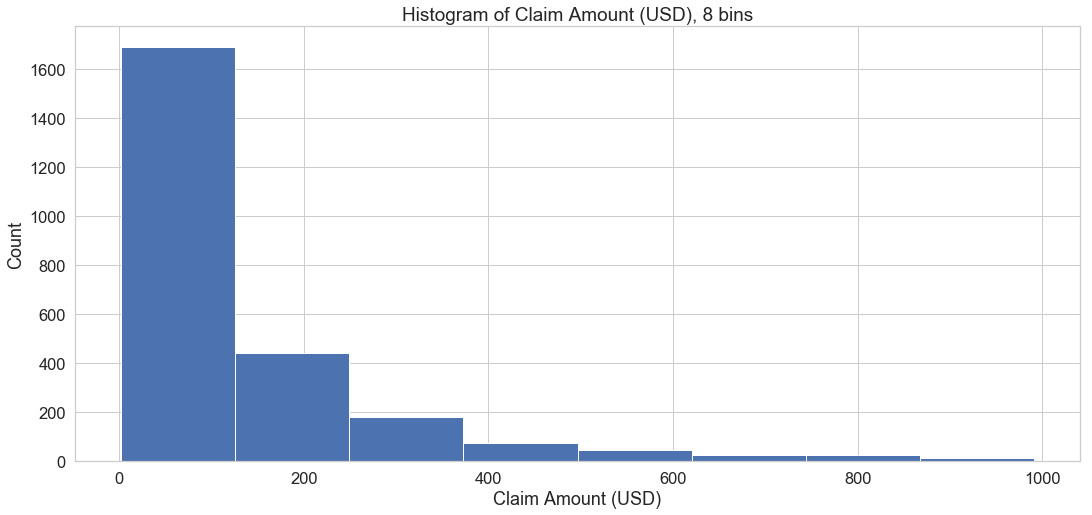

In [508]:

sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [18, 8]})

sns.distplot(ins_df['claim_amount'], norm_hist=False, kde=False, bins=8, hist_kws={"alpha": 1}
).set(xlabel='Claim Amount (USD)', ylabel='Count')

plt.title("Histogram of Claim Amount (USD), 8 bins" ,fontsize=19)

plt.show()

**ii)** The following `DataFrame` called `ins_df_agg_c` is given to you. Run the code. What is the interpretation of `count` in `ins_df_agg_c` with respect to the plotted histogram in **i)** ?  **`[0.5]`**

In [509]:
# No additional code is required.
ins_df_agg = pd.cut(ins_df['claim_amount'], 8).reset_index(name='bin_range')
ins_df_agg_c = ins_df_agg.groupby('bin_range').size().reset_index(name='count')
ins_df_agg_c

# What is the interpretation of count in ins_df_agg_c with respect to the plotted histogram?
# The count in ins_df_agg_c refers to the total number of claims filed by passengers with respect to a range of claim amounts (There are 8 ranges based on the 8 bins specific in the histogram for part i).
# For example, there are 1689 total number of claims filed by passengers for the claim amount ranging from 1.011 to 125.625.

,bin_range,count
0,"(1.011, 125.625]",1689
1,"(125.625, 249.25]",440
2,"(249.25, 372.875]",181
3,"(372.875, 496.5]",76
4,"(496.5, 620.125]",48
5,"(620.125, 743.75]",26
6,"(743.75, 867.375]",27
7,"(867.375, 991.0]",13


**1C.** You are given the details of some projects taken from the [KickStarter Projects](https://www.kaggle.com/kemical/kickstarter-projects) dataset. The definition of each column is as follows:

`ks-projects-15k.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| ID | internal kickstart ID | int | 59178964 |
| name | name of a kickstarter project | str | I Believe in King The Kid |
| main_category | category of a campaign | str | Music |
| backers | the number of backers a project has | int | 444 |
| usd_pledged_real | the amount that was pledged for the project, in USD | float | 27591.46 |
| usd_goal_real | the fundraising goal of the project, in USD | float | 55000 | 

#### Read from CSV to `df`
Read the dataset from `ks-projects-15k.csv` to a `DataFrame` called `kst_df`.

In [510]:
# Read from CSV to kst_df. Write your code here.
kst_df = pd.read_csv("ks-projects-15k.csv")

kst_df.head()

,ID,name,main_category,backers,usd_pledged_real,usd_goal_real
0,200590717,Brian's Songs: Love. Friendship. Dreams... and...,Film & Video,444,65050.50,55000.0
1,59178964,PUPPYCIDE: The Documentary,Film & Video,958,60397.50,100000.0
2,1696773081,I Believe In King The Kid,Music,676,27591.46,20000.0
3,1072617654,Lullabies from the Heart with Robert Robinson,Music,146,22259.32,22000.0
4,1003478705,The Wheelhouse: A Farm to Table Restaurant in ...,Food,43,10205.00,10000.0


**i)** Filter for all Kickstarter Projects where the total amount pledged in USD, or `usd_pledged_real` is greater than $\$10000$.  Store this in a new `DataFrame` called `kst_df_10k`. **`[0.5]`**

In [522]:
# Filter for all Kickstarter Projects where the usd_pledged_real is greater than 10000.
filt_cond1 = kst_df['usd_pledged_real'] > 10000

kst_df_10k = kst_df[filt_cond1]

kst_df_10k

,ID,name,main_category,backers,usd_pledged_real,usd_goal_real
0,200590717,Brian's Songs: Love. Friendship. Dreams... and...,Film & Video,444,65050.50,55000.0
1,59178964,PUPPYCIDE: The Documentary,Film & Video,958,60397.50,100000.0
2,1696773081,I Believe In King The Kid,Music,676,27591.46,20000.0
3,1072617654,Lullabies from the Heart with Robert Robinson,Music,146,22259.32,22000.0
4,1003478705,The Wheelhouse: A Farm to Table Restaurant in ...,Food,43,10205.00,10000.0
5,810597589,Heatit,Technology,252,16820.00,5000.0
6,1003481542,Air.Air! ~ Portable Air Quality Detector,Technology,292,21613.47,20000.0
7,101788707,The World's Best Running Shorts,Fashion,1129,69167.00,10000.0
8,1841330960,"Adventures of Pip - Wii U, Xbox One, PC & Mac",Games,1262,35510.99,90000.0
9,1712634105,The C12 by Bartaile - a convertible laptop bag,Design,554,92895.00,15000.0


**ii)** Create a new `DataFrame`, `kst_df_agg` where the first column is the `main_category` and the second column is called `n`. In `kst_df_agg`, `main_category` is the main category of `kst_df_10k` and `n` is the number of projects belonging to that `main_category`. Hint: use `df.groupby().size()`.  **`[0.5]`**

In [523]:
# Create an aggregated df with 1 column being the main_category and the other column
# being the no. of projects in that category.

kst_df_agg = kst_df_10k.groupby(['main_category']).size().reset_index()

kst_df_agg.columns = ['main_category', 'n']

kst_df_agg

,main_category,n
0,Art,77
1,Comics,70
2,Crafts,13
3,Dance,11
4,Design,289
5,Fashion,94
6,Film & Video,386
7,Food,155
8,Games,280
9,Journalism,12


**iii)** Using your answers to **(i)** and **(ii)** or otherwise, plot a bar graph where the $x$-axis is the `main_category` and the $y$-axis is the number of projects belonging to that `main_category`. **`[1]`**

Text(0.5, 1.0, 'Number of Projects by Categories')

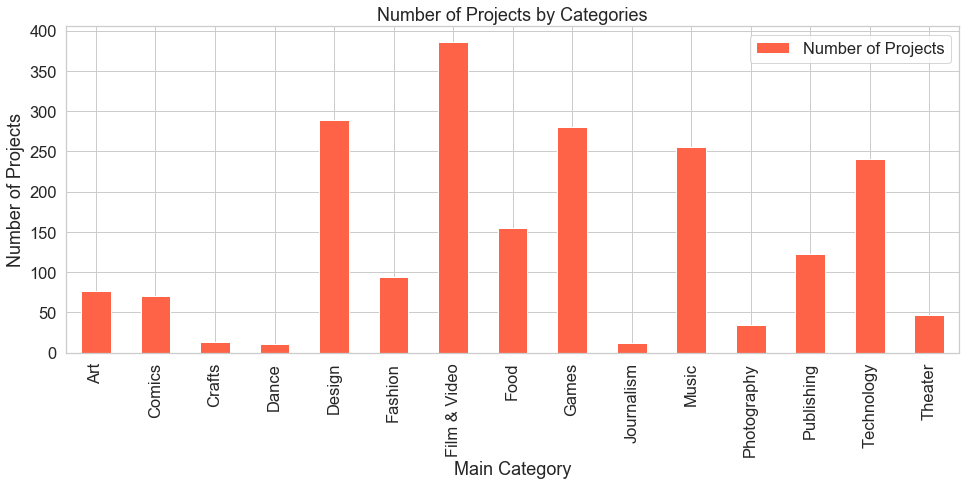

In [525]:
# Plot the bar graph where the x-axis is the main_category and 
# the y-axis is the number of projects belonging to that main_category

fig, ax = plt.subplots()

kst_df_agg.plot(kind = 'bar',
               x='main_category',
               y='n',
               figsize=(16,6),
               ax=ax,
               color='tomato')

ax.set_xlabel("Main Category")
ax.set_ylabel("Number of Projects")
ax.legend(["Number of Projects"])
ax.set_title("Number of Projects by Categories")

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 1, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>

### Part 2 (7 Marks)
For questions wtih short answers, <span style="color:darkblue">**both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span> <span style="color:darkblue">**For plotting, <u>all features</u> must be present to receive full credit.**</span>


**2A**. You are given the score and price of some bottles of wines taken from the [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) dataset. The definition of each column is as follows:

`wines-200.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| country | The country that the wine is from | str | US |
| points | The number of points WineEnthusiast rated the wine on a scale of 1-100 | int | 86 |
| price | The price of the bottle of wine | float | 12.0 |

#### Read from CSV to `df`
Read the dataset from `wines-200.csv` to a `DataFrame` called `wines_df`.

In [526]:
# Read from CSV to wines_df. Write your code here.
wines_df = pd.read_csv("wines-200.csv")
wines_df.shape

(200, 3)

**i)**. Using `dropna()`, remove all records where the `price` value is not given. What is the `shape` of `wines_df` after removing the values?**`[0.5]`**

In [528]:
# Remove the records where the price is not given
wines_df = wines_df.dropna(subset=['price'])
# What is the shape of wines_df after removing the values?
wines_df.shape
# The Shape of Wines is 185 (rows) x 3(columns)

(185, 3)

**ii)**. Using your answers to **i)** or otherwise, plot a scatterplot where the $x$-axis represents the number of points a wine has received, and the $y$-axis is the price of the wine. Only plot for points where <u>both the point and price value exist</u>. The title, $x$-axis label and $y$-axis label **must be shown** to obtain full credit. **`[1]`**

Text(0.5, 1.0, 'Price ($) vs Points')

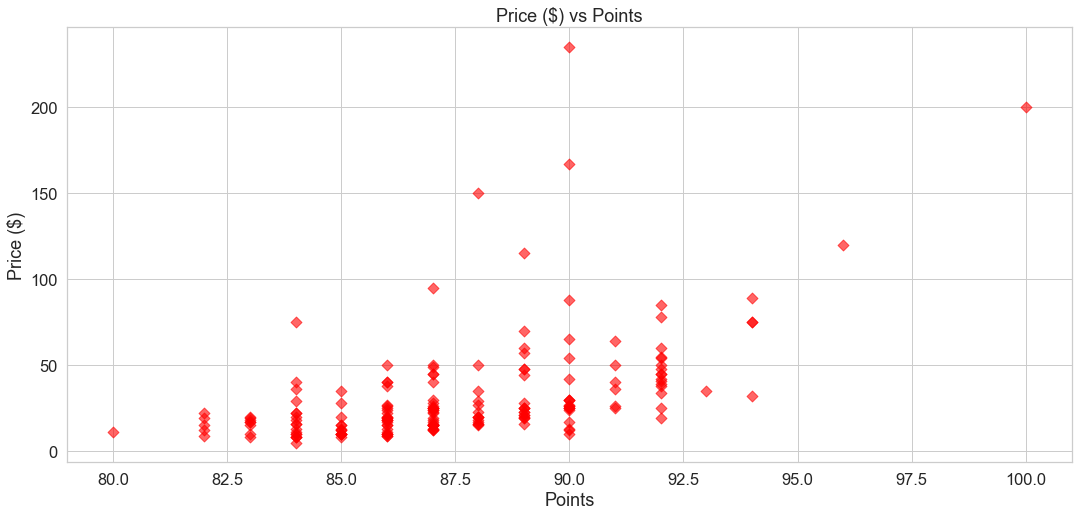

In [529]:
# Plot the scatterplot where the x-axis represents the number of points a wine has received, 
# and the y-axis is the price of the wine.

#Drop points if NaN since price (Nan) has already being dropped previously
wines_df = wines_df.dropna(subset=['points'])

wines_df.plot(kind='scatter',
             x ='points',
             y ='price',
             marker ='D',
             s =60,
             alpha = 0.6,
             color = 'red')

plt.xlabel("Points")
plt.ylabel("Price ($)")
plt.title("Price ($) vs Points", fontsize=18)

**iii)** Complete the code below to plot a boxplot showing the distribution of the `point`s of the bottles of wines.  **`[0.5]`**

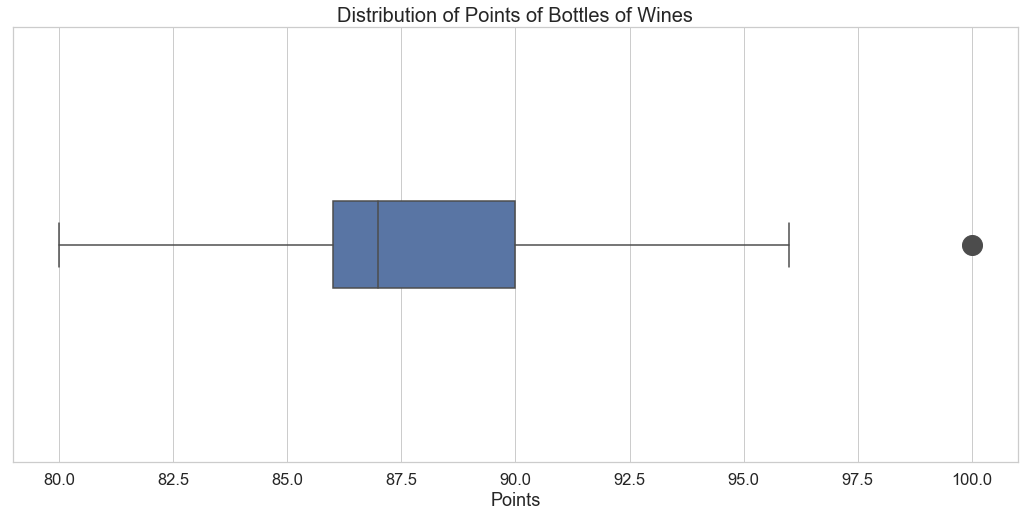

In [530]:
# Complete the code below to plot a boxplot.
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [18, 8]})

flierprops = dict(marker='o', markersize=20)
sns.boxplot(x='points',data = wines_df,orient="h", width=0.2,flierprops=flierprops).set(xlabel='Points')

plt.title("Distribution of Points of Bottles of Wines",fontsize = 20)

# Show the boxplot
plt.show()

**iv)** Using the plot of **iii)** to help you or otherwise, find the number of outliers for the `point`s distribtution of the wines dataset. **`[0.5]`**

In [531]:
# Find the number of outliers for the points distribtution of the wines dataset.
p25 = np.percentile(wines_df['points'], 25)
p75 = np.percentile(wines_df['points'], 75)

IQR = p75-p25

lower_bound = p25 - 1.5*IQR

upper_bound = p75 + 1.5*IQR

cond1 = wines_df['points'] > upper_bound 
cond2 = wines_df['points'] < lower_bound

outliers_df = wines_df[cond1 | cond2]

print("There is/are", len(outliers_df), "outlier(s) for the points distribution of the dataset")
# How many outliers are there for the points distribtution of the wines dataset?
# There is 1 outlier for the point distribution of the dataset


There is/are 1 outlier(s) for the points distribution of the dataset


<hr>
**2B.** You are given the number of loans per term for each grade taken from a sample from the [Lending Club Dataset](https://www.kaggle.com/wendykan/lending-club-loan-data). The definition of each column is as below.

`loans-by-grade.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| grade | The grade scored | str | A |
| 36 months | The number of loans with a 36 month term (repayment must be complete in 3 years) | int | 18572 |
| 60 months | The number of loans with a 60 month term (repayment must be complete in 5 years) | int | 8013 |

#### Read from CSV to `df`
Read the dataset from `loans-by-grade.csv` to a `DataFrame` called `loans_df`.

In [532]:
# Read from CSV to loans_df. Write your code here.
loans_df = pd.read_csv('loans-by-grade.csv')

loans_df

,grade,36 months,60 months
0,A,18572,670
1,B,27570,5572
2,C,21087,10739
3,D,9973,8013
4,E,2859,6296
5,F,580,2353
6,G,96,620


**i)** Add a column to `loans_df` called `Total Loans`. This represents the total number of 36 & 60 month loans belonging to the grade. **`[0.5]`**.

In [533]:
#Add a column to loans_df called 'Total Loans'
loans_df['Total Loans']  = loans_df.apply(lambda x: x['36 months'] + x['60 months'],axis = 1)

loans_df

,grade,36 months,60 months,Total Loans
0,A,18572,670,19242
1,B,27570,5572,33142
2,C,21087,10739,31826
3,D,9973,8013,17986
4,E,2859,6296,9155
5,F,580,2353,2933
6,G,96,620,716


**ii)** 
- What proportion of the loans in Grade **A** are 36 month loans?
- What proportion of the loans in Grade **A** are 60 month loans? 

**`[0.5]`**

In [534]:
# What proportion of the loans in Grade A are 36 month loans?
# Code is not required. However, you could modify this line of code to help you
# 18572 / (18572 + 670)

# The proportion of the loans in Grade A that are 36 month loans is 0.96518033 (Ratio)

In [535]:
# What proportion of the loans in Grade A are 60 month loans?
# Code is not required. However, you could modify this line of code to help you
# 670/ (18572 + 670)

# The proportion of the loans in Grade A that are 60 month loan 0.03481967 (Ratio)

**iii)** Using the answers to **i)** and **ii)** or otherwise, add 2 columns to `loan_df`:

- `36 months percentage` is the proportion of loans that has a 36 month term **belonging to the grade**

- `60 months percentage` is the proportion of loans that has a 60 month term **belonging to the grade**

**`[1]`**

In [536]:
# Write the code for adding the columns to loans_df below.
# Values on Percentage instead of Ratio
loans_df['36 months percentage']  = loans_df.apply(lambda x: (x['36 months']/x['Total Loans'])*100,axis = 1)
loans_df['60 months percentage']  = loans_df.apply(lambda x: (x['60 months']/x['Total Loans'])*100,axis = 1)

loans_df

,grade,36 months,60 months,Total Loans,36 months percentage,60 months percentage
0,A,18572,670,19242,96.518033,3.481967
1,B,27570,5572,33142,83.187496,16.812504
2,C,21087,10739,31826,66.257148,33.742852
3,D,9973,8013,17986,55.448682,44.551318
4,E,2859,6296,9155,31.228837,68.771163
5,F,580,2353,2933,19.774974,80.225026
6,G,96,620,716,13.407821,86.592179


**iv)** Plot a stacked bar-graph where each bar in the $x$-axis is a grade and the $y$-axis represents the percentage of loans belonging to the grade. Hint: As **each bar represents a percentage**, all bars have the **same height** of $100\%$. Also, use `DataFrame.plot(kind='bar', stacked=True)` and add more parameters accordingly. **`[1]`**

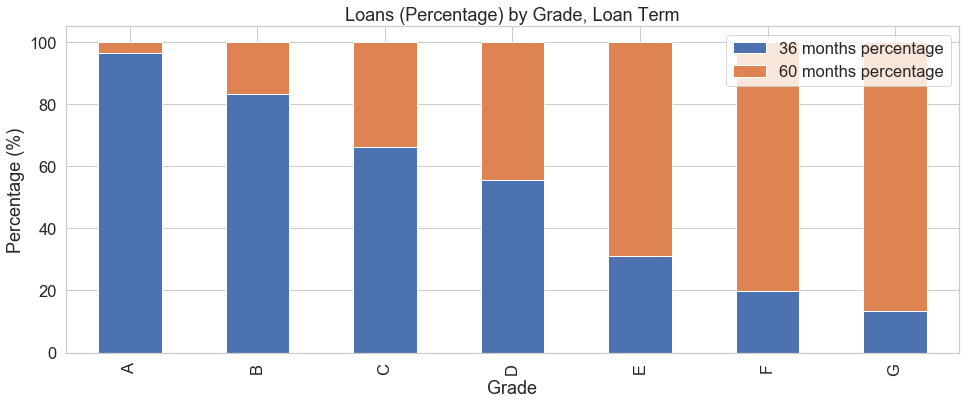

In [538]:
# Write the code for plotting the stacked bar-graph below.
loans_df = loans_df[['grade','36 months percentage', '60 months percentage']]
loans_groupby_df = loans_df.set_index('grade')

fig, ax1 = plt.subplots()

loans_groupby_df.plot(kind = 'bar',
                     stacked =True,
                     figsize=(16,6),
                     title = "Loans (Percentage) by Grade, Loan Term",
                     ax = ax1)
ax1.set_ylabel("Percentage (%)")
ax1.set_xlabel("Grade")
plt.show()

**2C**. You will be using the `wines-200.csv` again for this question. Read from the `wines-200.csv` dataset from **2A** to `wines_df2`. Remember to perform the `dropna()` step.

In [539]:
# Read from CSV file to wines_df2
# Remember to dropna()
wines_df2 = pd.read_csv("wines-200.csv")
wines_df2 = wines_df2.dropna(subset=['price','points'])

wines_df2.head()

,country,points,price
0,US,86,50.0
1,Italy,92,48.0
2,France,89,19.0
3,US,92,34.0
4,US,84,20.0


**i) **Find the top 2 countries with the most wines in the dataset. **`[0.5]`**

In [540]:
# What are the top 2 countries in terms of number of wines produced?
wines_df2_gb = wines_df2.groupby(['country']).size().reset_index(name='Count')

wines_top2 = wines_df2_gb.nlargest(2, ['Count'])['country'].values

print("Top 2 Countries with the most wines in the dataset are", wines_top2)

# The top 2 countries with the most wines in the dataset are US and Italy

Top 2 Countries with the most wines in the dataset are ['US' 'Italy']


**ii)** Using your answer in **(i)** or otherwise, debug and complete the following code to plot a violin plot of the wine prices of the top 2 countries with the most wines in the dataset. There should be a seperate violin plot for each country in the top 2. Refer to the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html), this [Stackoverflow answer](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and this [Stackoverflow answer](https://stackoverflow.com/questions/48803619/what-is-the-correct-way-to-create-a-violin-plot-that-has-one-violin-split-by-hue) to help you. **`[1]`**

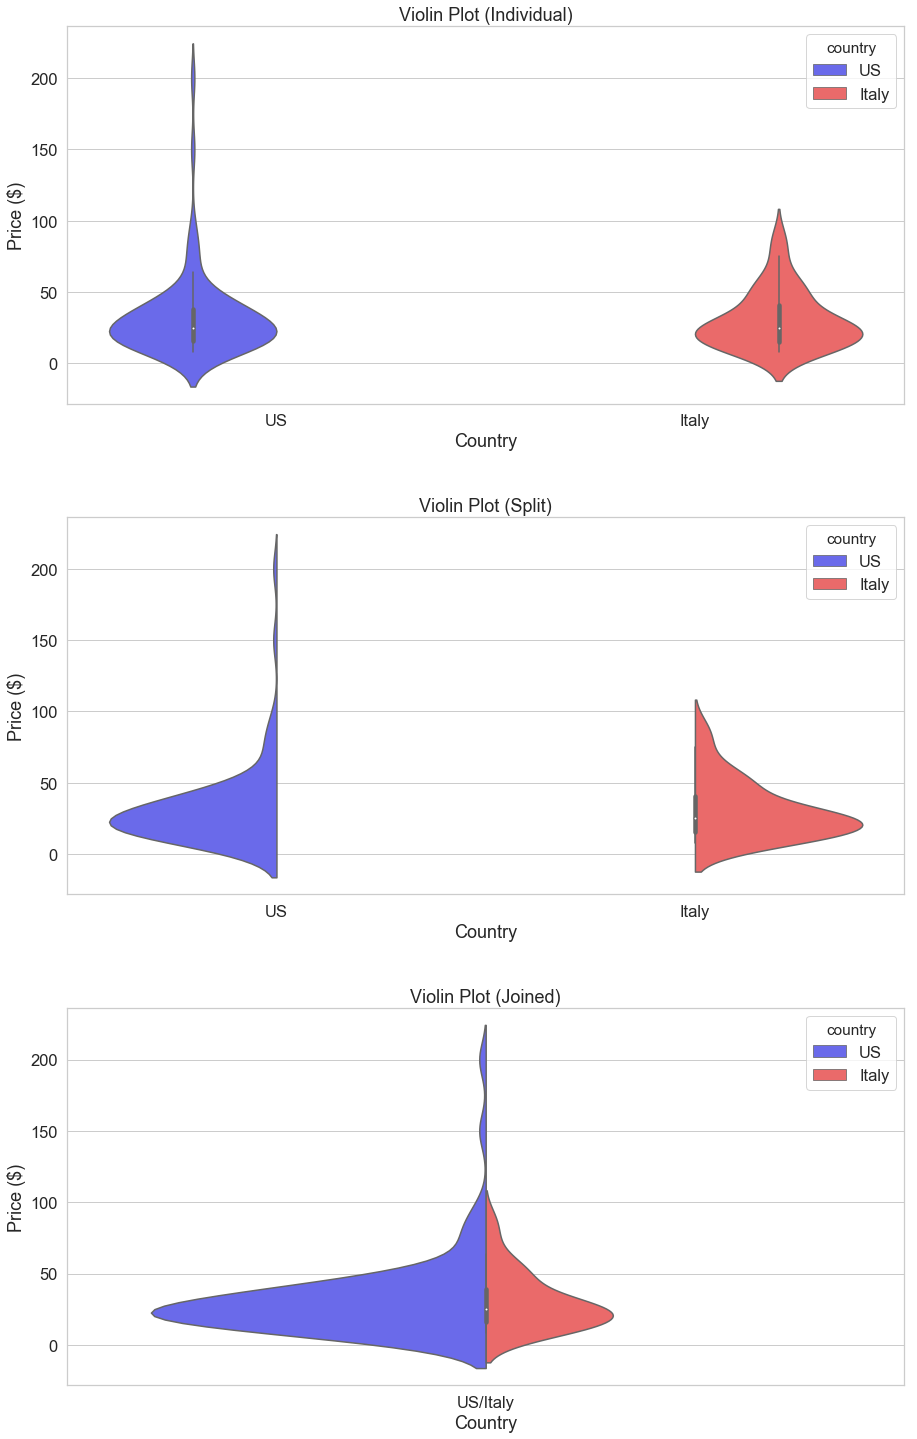

In [541]:
# Debug and complete the code for plotting the violin below.

#From (i) we know that US and Italy are the top 2 countries with the most wines

filt_cond1 = wines_df2['country'] == wines_top2[0]
filt_cond2 = wines_df2['country'] == wines_top2[1]

wines_df2_filt = wines_df2[filt_cond1 | filt_cond2]

fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.3)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0, :])
ax1 = sns.violinplot(x="country",
               y="price",
               scale="count",
               data = wines_df2_filt,
               palette="seismic",
               hue="country")

ax1.set_title("Violin Plot (Individual)")
ax1.set_xlabel("Country")
ax1.set_ylabel("Price ($)")

ax2 = fig.add_subplot(gs[1, :])
ax2 = sns.violinplot(x="country",
               y="price",
               scale="count",
               data = wines_df2_filt,
               palette="seismic",
               split="true",
               hue="country")

ax2.set_title("Violin Plot (Split)")
ax2.set_xlabel("Country")
ax2.set_ylabel("Price ($)")

ax3 = fig.add_subplot(gs[2, :])
ax3 = sns.violinplot(x=["US/Italy"]*len(wines_df2_filt),
               y="price",
               scale="count",
               data = wines_df2_filt,
               palette="seismic",
               split="true",
               hue="country")
ax3.set_title("Violin Plot (Joined)")
ax3.set_xlabel("Country")
ax3.set_ylabel("Price ($)")

plt.show()

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 2, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>